# Visualization of manuscript figures

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Model selection

In [36]:
model_selection_results = pd.read_csv('figure_data/model_selection.csv', index_col = 0)

# show model selection metrics for each model 
model_selection_results_rounded = model_selection_results .round(2)
model_selection_results_rounded 

,l1-ratio,modus,inverse regularisation strength C,regularisation strength alpha,ROC_AUC,non_zero_coefficients,AIC,BIC
0,0.1,elbow point,0.01,79.25,0.79,30,1878.87,2169.53
1,0.2,elbow point,0.02,44.31,0.79,25,1833.84,2124.50
2,0.3,elbow point,0.03,31.26,0.79,24,1811.00,2101.66
3,0.4,elbow point,0.04,23.64,0.79,25,1793.19,2083.86
4,0.5,elbow point,0.02,41.32,0.77,14,1905.98,2196.65
5,0.6,elbow point,0.01,68.93,0.71,4,2042.56,2333.23
6,0.7,elbow point,0.02,58.57,0.71,4,2032.91,2323.58
7,0.8,elbow point,0.02,50.94,0.71,4,2024.68,2315.34
8,0.9,elbow point,0.02,45.35,0.71,4,2018.65,2309.32
9,1.0,elbow point,0.02,40.37,0.71,4,2011.03,2301.69


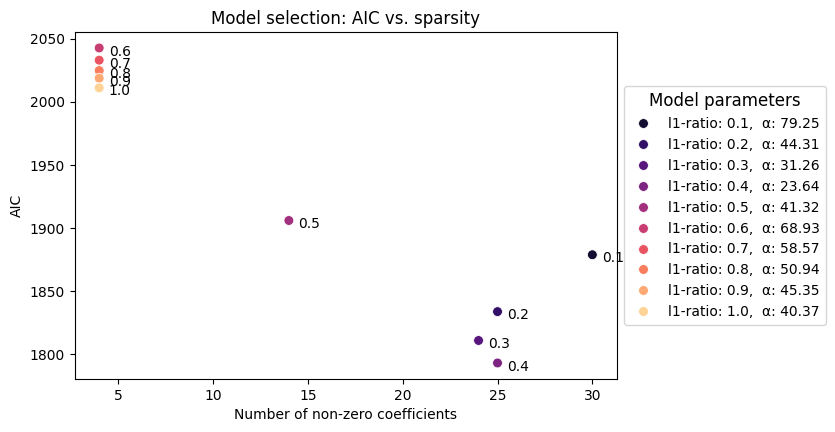

In [ ]:
# plot model selection results
# scatter plot: AIC vs. sparsity (number of non-zero coefficients)

# trained models with regularisation strength from elbow point
plt.figure(figsize=(7, 4.5))
scatter_elbow = sns.scatterplot(data = model_selection_results, x ='non_zero_coefficients', 
                                y ='AIC', hue ='l1-ratio', palette = sns.color_palette("magma", 10), s = 50)

for i in range(model_selection_results.shape[0]): # add l1-ratio labels to scatter points 
    plt.text(
        model_selection_results['non_zero_coefficients'].iloc[i] + 0.5, 
        model_selection_results['AIC'].iloc[i] - 6,
        f'{model_selection_results["l1-ratio"].iloc[i]:.1f}',  
        fontsize = 10,
        ha = 'left')
    
handles, labels = scatter_elbow.get_legend_handles_labels() # add l1-ratio and regularization strenght (alpha) to legend
custom_labels = [
    f'l1-ratio: {model_selection_results["l1-ratio"].iloc[i]:.1f}, '
    f' α: {model_selection_results["regularisation strength alpha"].iloc[i]:.2f}'
    for i in range(len(labels) )]

plt.legend(handles = handles[:], labels = custom_labels, title = 'Model parameters', title_fontsize='12', loc='center left',  bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of non-zero coefficients')
plt.ylabel('AIC')
plt.title('Model selection: AIC vs. sparsity')
plt.show()

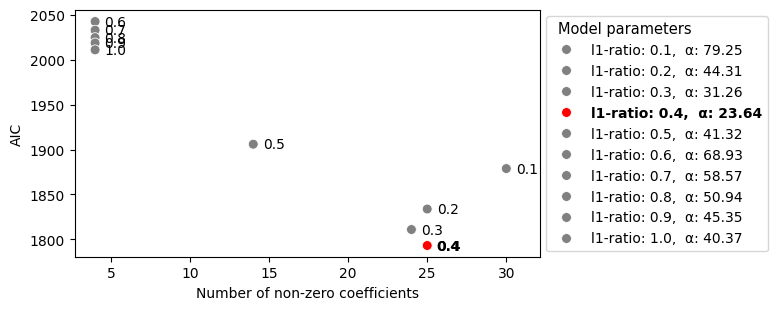

In [64]:
plt.figure(figsize=(6, 3.2))
color_selected_model = {0.4: 'red'}
color_palette = [color_selected_model.get(val, 'gray') for val in model_selection_results['l1-ratio'].unique()]

scatter_elbow = sns.scatterplot(data = model_selection_results, x ='non_zero_coefficients', 
                                y ='AIC', hue ='l1-ratio', palette = color_palette , s = 50)

for i in range(model_selection_results.shape[0]): # add l1-ratio labels to scatter points 
    if i == 3: # highlight selected model 
        plt.text(
        model_selection_results['non_zero_coefficients'].iloc[i] + 0.6, 
        model_selection_results['AIC'].iloc[i] - 5,
        f'{model_selection_results["l1-ratio"].iloc[i]:.1f}',  
        fontsize = 10, fontweight='bold', 
        ha = 'left')
    plt.text(
        model_selection_results['non_zero_coefficients'].iloc[i] + 0.6, 
        model_selection_results['AIC'].iloc[i] - 5,
        f'{model_selection_results["l1-ratio"].iloc[i]:.1f}',  
        fontsize = 10,
        ha = 'left')
    
handles, labels = scatter_elbow.get_legend_handles_labels() # add l1-ratio and regularization strenght (alpha) to legend

legend = plt.legend(handles = handles[:], labels = custom_labels, title = 'Model parameters              ', 
                    title_fontsize='10.5', loc='center left', bbox_to_anchor=(1, 0.5))
for i, text in enumerate(legend.get_texts()):
    if i == 3: text.set_fontweight('bold') # highlight selected model 

plt.xlabel('Number of non-zero coefficients')
plt.ylabel('AIC')
x_min, x_max = plt.xlim()
plt.xlim(x_min, x_max + 0.8)  
plt.savefig('model_selection.png', dpi = 600, bbox_inches='tight')  
plt.show()

## Bootstrapped regression coefficients

In [18]:
multivariable_results = pd.read_csv('figure_data/multivariable_coefficients.csv', index_col = 0)
bootstrapped_coefficients = pd.read_csv('figure_data/bootstrapped_coefficients.csv')

In [11]:
# show significant features
significant_features = multivariable_results.loc[multivariable_results['p_values'] < 0.05]['Feature']
print(f'Significant variables from the multivariable analysis: \n{significant_features}')

Significant variables from the multivariable analysis: 
3                             ALL_DRUGS
8                ALL_TESTSTIPOS_CHLA_w3
16                   SEXLIFE_Discontent
18                      alter_18-29 yrs
22                     ALL_SEXPARTNER_1
23                 ALL_SEXPARTNER_11-20
24                   ALL_SEXPARTNER_2-3
25                   ALL_SEXPARTNER_4-5
34                        ALL_KONDOM_0%
35                       ALL_KONDOM_50%
37                      ALL_KONDOM_>95%
38    NET_EQUIVALENT_INCOME_1 bis <1000
46         HIV_SPECIALIST_DENSITY_10-13
Name: Feature, dtype: object


In [15]:
# show all regression coefficients, CIs and p-values 
columns_2_decimal = ['Coefficient', 'lower 95% CI', 'upper 95% CI']
columns_3_decimal = ['p_values']

multivariable_results_rounded = multivariable_results.copy()
multivariable_results_rounded[columns_2_decimal] = multivariable_results_rounded[columns_2_decimal].round(2)
multivariable_results_rounded[columns_3_decimal] = multivariable_results_rounded[columns_3_decimal].round(3)
multivariable_results_rounded

,Feature,Coefficient,lower 95% CI,upper 95% CI,p_values
0,ALL_SEXWITH_MEN,0.00,0.00,0.00,1.000
1,ALL_SEXWITH_WOMEN,-0.23,-0.48,0.00,0.056
2,ALL_SEXWITH_NONBINARY,0.00,0.00,0.00,0.999
3,ALL_DRUGS,-0.38,-0.58,-0.17,0.000
4,ALL_SEXWORK,0.00,-0.20,0.00,0.653
5,ALL_STI_SYMPTOM,0.00,-0.14,0.01,0.726
6,ALL_TESTSTIPOS_SYPH_w3,0.00,-0.03,0.12,0.813
7,ALL_TESTSTIPOS_GO_w3,0.11,0.00,0.32,0.100
8,ALL_TESTSTIPOS_CHLA_w3,0.41,0.20,0.62,0.000
9,ALL_TESTSTIPOS_HCV_w3,0.00,-0.21,0.00,0.680


In [28]:
# plot bootstrapped regression coefficients

# only plot significant variables and their strata
plot_variables = ['ALL_DRUGS', 'ALL_TESTSTIPOS_CHLA_w3', 'SEXLIFE_Discontent', 'SEXLIFE_Sex doesnt matter right now',
                  'alter_18-29 yrs', 'alter_40-49 yrs', 'alter_50-80 yrs', 'ALL_SEXPARTNER_0', 'ALL_SEXPARTNER_1', 'ALL_SEXPARTNER_11-20',
                  'ALL_SEXPARTNER_2-3', 'ALL_SEXPARTNER_4-5', 'ALL_SEXPARTNER_6-10',
                  'ALL_KONDOM_0%', 'ALL_KONDOM_50%', 'ALL_KONDOM_75%', 'ALL_KONDOM_>95%',
                  'NET_EQUIVALENT_INCOME_1 bis <1000', 'NET_EQUIVALENT_INCOME_1000 bis <2000', 'NET_EQUIVALENT_INCOME_3000 bis <4000',
                  'NET_EQUIVALENT_INCOME_4000 bis <5000', 'NET_EQUIVALENT_INCOME_5000+',
                  'HIV_SPECIALIST_DENSITY_0', 'HIV_SPECIALIST_DENSITY_1-2', 'HIV_SPECIALIST_DENSITY_10-13', 'HIV_SPECIALIST_DENSITY_3-5']

plot_bst_strata = bootstrapped_coefficients[plot_variables]

# add reference category to plot for completeness (no coefficients estimated)
plot_bst_strata['30-39 (R)'] = 0
plot_bst_strata['6-9 (R)'] = 0
plot_bst_strata['2,000 - <3,000€ (R)'] = 0
plot_bst_strata['Content (R)'] = 0
plot_bst_strata['>20 (R)'] = 0
plot_bst_strata['25% (R)'] = 0

plot_bst_strata_renamed = plot_bst_strata.rename(columns = {'alter_18-29 yrs': r'$\mathbf{Age\ (years)}$ 18-29',
                                                            'alter_40-49 yrs': '40-49', 'alter_50-80 yrs': '50-80',
                                                            'HIV_SPECIALIST_DENSITY_0': r'$\mathbf{HIV-specialists\ density}$ 0', 'HIV_SPECIALIST_DENSITY_1-2':'1-2', 
                                                            'HIV_SPECIALIST_DENSITY_3-5': '3-5', 'HIV_SPECIALIST_DENSITY_10-13': '10-13',
                                                            'NET_EQUIVALENT_INCOME_1 bis <1000': r'$\mathbf{Monthly\ net\  equivalent\ income}$ 1 - <1,000€',
                                                            'NET_EQUIVALENT_INCOME_1000 bis <2000': '1,000 - <2,000€',
                                                            'NET_EQUIVALENT_INCOME_3000 bis <4000': '3,000 - <4,000€',
                                                            'NET_EQUIVALENT_INCOME_4000 bis <5000': '4,000 - <5,000€', 
                                                            'NET_EQUIVALENT_INCOME_5000+': r'$\geq$5,000€',
                                                            'SEXLIFE_Discontent': r'$\mathbf{Satisfaction\ with\ sex\ life}$ Discontent',
                                                            'SEXLIFE_Sex doesnt matter right now': "Sex doesn't matter right now",
                                                            'ALL_SEXPARTNER_0': r'$\mathbf{Sex\ partners\ in\ the\ last\ 6\ months}$ 0',
                                                            'ALL_SEXPARTNER_1': '1',
                                                            'ALL_SEXPARTNER_2-3': '2-3',
                                                            'ALL_SEXPARTNER_4-5': '4-5',
                                                            'ALL_SEXPARTNER_6-10': '6-10',
                                                            'ALL_SEXPARTNER_11-20': '11-20',
                                                            'ALL_KONDOM_0%': r'$\mathbf{Condom\ use}$ 0%',
                                                            'ALL_KONDOM_50%': '50%',
                                                            'ALL_KONDOM_75%': '75%',
                                                            'ALL_KONDOM_>95%': '>95%',
                                                            'ALL_DRUGS': r'$\mathbf{Sexualized\ substance\ use\ in\ the\ last\ 6\ months}$',
                                                            'ALL_TESTSTIPOS_CHLA_w3': r'$\mathbf{Chlamydia\ diagnosis\ in\ the\ past}$'})

column_order = [r'$\mathbf{Age\ (years)}$ 18-29', '30-39 (R)', '40-49 ', '50-80', r'$\mathbf{HIV-specialists\ density}$ 0', '1-2', '3-5', '6-9 (R)', '10-13',
                r'$\mathbf{Monthly\ net\  equivalent\ income}$ 1 - <1,000€', '1,000 - <2,000€', '2,000 - <3,000€ (R)', '3,000 - <4,000€', '4,000 - <5,000€', r'$\geq$5,000€',
                r'$\mathbf{Satisfaction\ with\ sex\ life}$ Discontent', 'Content (R)', "Sex doesn't matter right now", 
                r'$\mathbf{Sex\ partners\ in\ the\ last\ 6\ months}$ 0', '1', '2-3', '4-5', '6-10', '11-20', '>20 (R)', 
                r'$\mathbf{Condom\ use}$ 0%', '25% (R)', '50%', '75%', '>95%',
                r'$\mathbf{Sexualized\ substance\ use\ in\ the\ last\ 6\ months}$', 
                r'$\mathbf{Chlamydia\ diagnosis\ in\ the\ past}$']

# color code boxplots: 
# - orange (associated with non-PrEP use)
# - seagreen (associated with PrEP use)
column_colors = {r'$\mathbf{Age\ (years)}$ 18-29': 'orange', '30-39 (R)': 'grey', '40-49': 'grey', '50-80': 'grey',
                r'$\mathbf{HIV-specialists\ density}$ 0': 'grey', '1-2': 'grey', '3-5': 'grey', '6-9 (R)': 'grey', '10-13': 'seagreen',
                r'$\mathbf{Monthly\ net\  equivalent\ income}$ 1 - <1,000€': 'orange', '1,000 - <2,000€': 'grey', '2,000 - <3,000€ (R)': 'grey', '3,000 - <4,000€': 'grey', 
                '4,000 - <5,000€': 'grey', r'$\geq$5,000€': 'grey',
                r'$\mathbf{Satisfaction\ with\ sex\ life}$ Discontent': 'orange', 'Content (R)': 'grey', "Sex doesn't matter right now": 'grey', 
                r'$\mathbf{Sex\ partners\ in\ the\ last\ 6\ months}$ 0': 'grey', '1': 'orange', '2-3': 'orange', '4-5': 'orange', '6-10': 'grey', '11-20': 'seagreen', '>20 (R)': 'grey', 
                r'$\mathbf{Condom\ use}$ 0%': 'seagreen', '25% (R)': 'grey', '50%': 'orange', '75%': 'grey', '>95%': 'orange',
                r'$\mathbf{Sexualized\ substance\ use\ in\ the\ last\ 6\ months}$': 'orange',
                r'$\mathbf{Chlamydia\ diagnosis\ in\ the\ past}$': 'seagreen'}

color_palette = [column_colors.get(col, 'gray') for col in plot_bst_strata_renamed.columns]

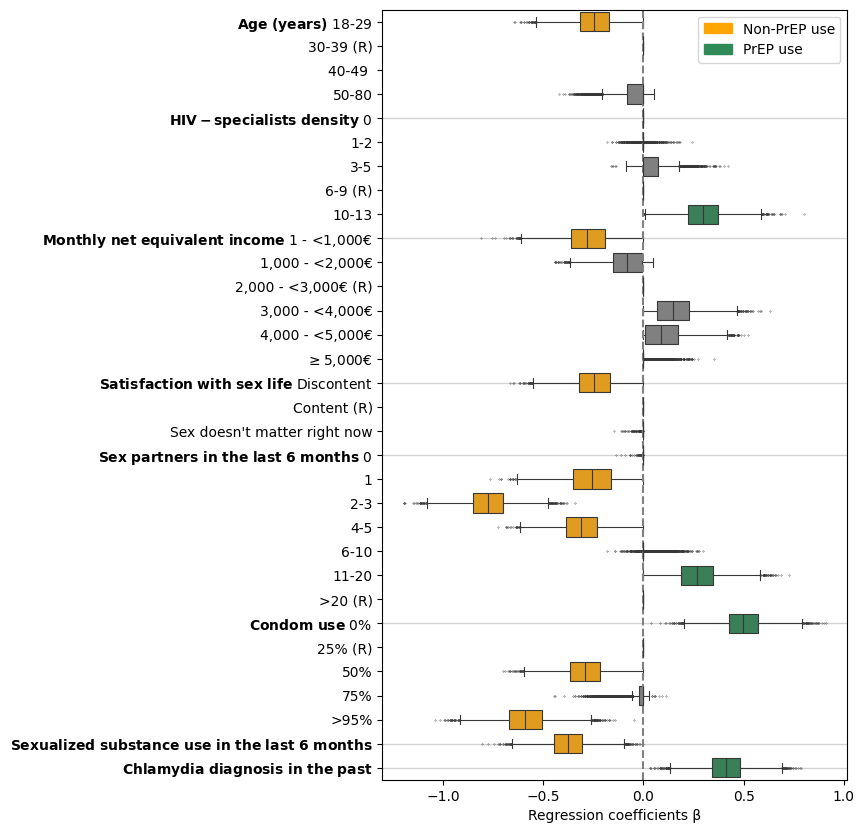

In [30]:
plt.figure(figsize=(6, 10))
sns.boxplot(data = plot_bst_strata_renamed , 
            orient = "h", 
            fliersize = 0.3,
            linewidth = 0.8,
            order = column_order,
            palette= color_palette)
plt.xlabel('Regression coefficients β')
plt.ylabel('')

y_ticks_to_mark= [4, 9, 15, 18, 25, 30, 31]
for y in y_ticks_to_mark:
    plt.axhline(y=y, color='lightgrey', linestyle='-', linewidth=1, zorder=0)


plt.axvline(x = 0, color = 'grey', linestyle='--')
no_prep = mpatches.Patch(color = 'orange', label = 'Non-PrEP use')
prep = mpatches.Patch(color = 'seagreen', label = 'PrEP use')
plt.legend(handles=[no_prep, prep]) 
plt.savefig('boxplot_bst_coef_significant_variables.png', dpi = 600, bbox_inches='tight')  
plt.show()